In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
import numpy as np

In [5]:
data_user=pd.read_csv("users.csv",delimiter=';')

In [6]:
data_user.head()

,account_name,followers_count,following_count
0,just_4ina,293,295
1,sapargalinauryzbay,223,247
2,justaskhat,421,1062
3,timur.a.k_03,49,170
4,abyllash,186,179


## Выбрать юзера с максимальным followers_count (Популярный аккуант)


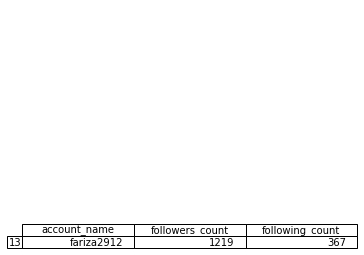

In [7]:
account_fols_max=data_user.followers_count.max()
user_max_followers=data_user[data_user.followers_count==account_fols_max]
ax = plt.subplot(111, frame_on=False) 
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  

table(ax, user_max_followers) 

## Выбрать юзера с максимальным following_count


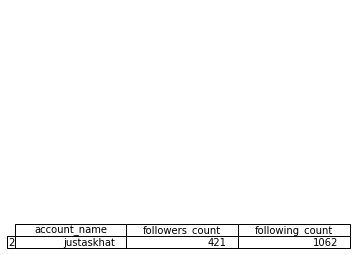

In [8]:
account_folg_max=data_user.following_count.max()
user_max_folg=data_user[data_user.following_count==account_folg_max]
ax = plt.subplot(111, frame_on=False) 
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  

table(ax, user_max_folg) 

## Можно ли сказать что аккуант justaskhat самый популярный? Скорее всего у него больше подписчиков, потому что много подписок 


0     0.993220
1     0.902834
2     0.396422
3     0.288235
4     1.039106
5     0.987654
6     3.727273
7     0.917910
8     1.019417
9     0.801075
10    0.947368
11    0.826558
12    0.682594
13    3.321526
14    0.572082
15    0.633117
16    0.637450
17    0.529617
18    2.112613
19    0.297468
20    1.073569
21    1.431711
22    0.559083
23    1.369697
24    0.363208
25    1.489209
26    0.518919
27    0.719298
28    1.173010
dtype: float64


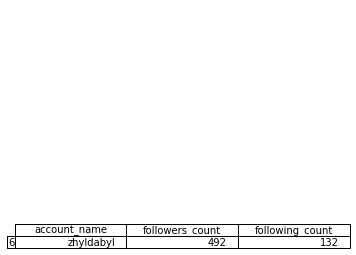

In [9]:
a=data_user.followers_count/data_user.following_count
print(a)
max_per=a.max()
user_popular=data_user[data_user.followers_count/data_user.following_count==max_per]

ax = plt.subplot(111, frame_on=False) 
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  

table(ax, user_popular) 



## Самая популярная страница zhyldabyl. Так как там концентрация подписчиков больше подписок


In [12]:
data_posts=pd.read_csv("posts.csv",delimiter=';')

## Среднее кол-во лайков у каждого аккаунта


In [14]:
accounts = data_posts.groupby('account')
mean_acc_likes=accounts['likes_count'].agg(np.mean)
print(mean_acc_likes)

account
_janb0                    48.285714
aigeriim.s                60.680556
almagambetoff            102.659091
anarabildina              85.717557
fariza2912               137.800000
fearless_white_master    137.714286
jabrail.chumakov         128.315789
kud_adi                   84.000000
ngm.orz                   52.962963
nur.rymtayev              76.000000
ollzhaa                  224.400000
perizat.mukhanova         41.887805
rtolganay                120.666667
sandu2065mail.ru          25.144737
sultan_aytzhan            84.666667
yersultanrais            114.437500
Name: likes_count, dtype: float64


## Общее кол-во лайков

In [16]:
sum_acc_likes=accounts['likes_count'].agg(np.sum)
print(sum_acc_likes)

account
_janb0                     676
aigeriim.s                4369
almagambetoff             4517
anarabildina             11229
fariza2912                2067
fearless_white_master     1928
jabrail.chumakov          4876
kud_adi                    672
ngm.orz                   4290
nur.rymtayev                76
ollzhaa                   2244
perizat.mukhanova         8587
rtolganay                 9412
sandu2065mail.ru          1911
sultan_aytzhan            5842
yersultanrais             1831
Name: likes_count, dtype: int64


In [17]:
print(data_posts.groupby('account').nunique())

                       posts  likes_count  location  type  description  \
account                                                                  
_janb0                    14           13         2     1            7   
aigeriim.s                72           43        19     2           63   
almagambetoff             44           37        19     2           41   
anarabildina             131           68        55     2          130   
fariza2912                15           15         3     1            6   
fearless_white_master     14           13         1     2            8   
jabrail.chumakov          38           29         1     2           34   
kud_adi                    8            7         4     2            5   
ngm.orz                   81           51        24     2           59   
nur.rymtayev               1            1         0     1            1   
ollzhaa                   10            9         4     1           10   
perizat.mukhanova        205          

## Аккаунт с максимальным среднем кол-вем лайков


account
ollzhaa    224.4
Name: likes_count, dtype: float64


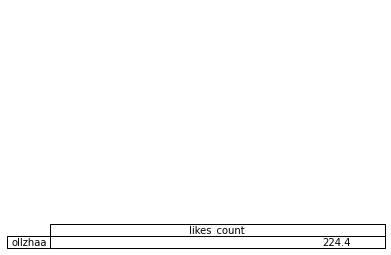

In [19]:
account_mean_max=mean_acc_likes.max()
account_max_mean_likes=mean_acc_likes[mean_acc_likes==account_mean_max]
print(account_max_mean_likes)
ax = plt.subplot(111, frame_on=False) 
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)
table(ax, account_max_mean_likes)


## Свод по локациям


In [24]:
a=data_posts[['location', "account"]].groupby('location').count().sort_values(by=['account'], ascending=False)
a.account.max()
print(a)


                                         account
location                                        
Almaty  Kazakhstan                            19
Suleyman Demirel University                   17
Suleyman Demirel University  Kazakhstan       12
Qazaq Republic                                 9
Yale-NUS College                               8
...                                          ...
Kuala Lipis  Negeri Sembilan  Malaysia         1
Kolsay Lakes National Park                     1
Kolsai Lake  Kazakhstan                        1
Khan Shatyr Entertainment Center               1
화성행궁 Suwon Hwaseong Haenggung                  1

[153 rows x 1 columns]



## Минимальное кол-во лайков по хэштэгу и максимальное


In [29]:
hashtags = data_posts.groupby('hashatags')
sum_likes_hashtags=hashtags['likes_count'].agg(np.sum).sort_values(ascending=False)
sum_likes_hashtags.head(20)

hashatags
Prom2016                                                       493
cipeweek7                                                      357
iamyalenus                                                     329
selfiebreak                                                    323
football altayclub zhez6-4oskemen zhezktl ktlbrotherhood✊✊✊    287
ForeverYoung                                                   281
годназад⏳                                                      260
Prom2016 126                                                   259
дэээ                                                           230
qngbsвделе                                                     215
enkushtifotka baiqapjurinder sorry                             213
throwbackfall2017                                              195
Beijing2017                                                    183
kazguu                                                         179
karktl                                              

## Тенденция получения лайков по каждому пользователю

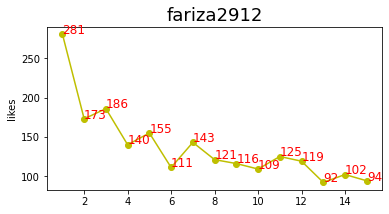

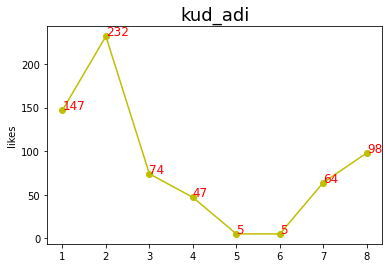

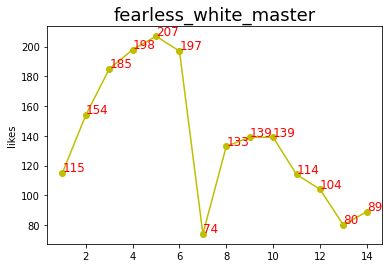

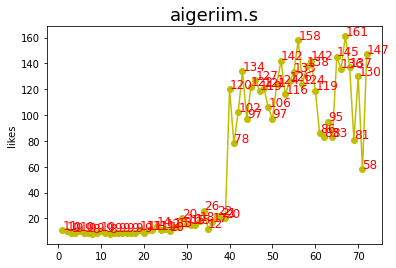

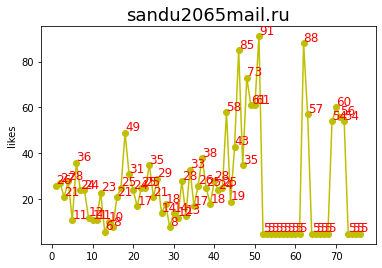

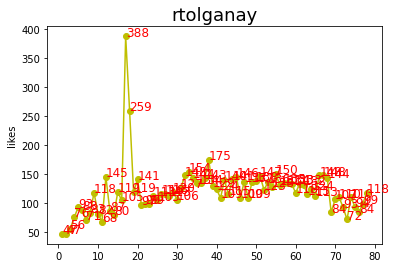

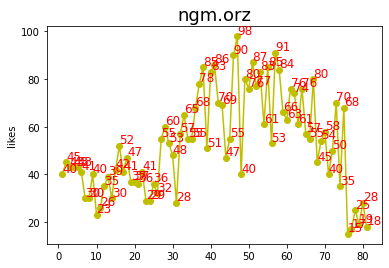

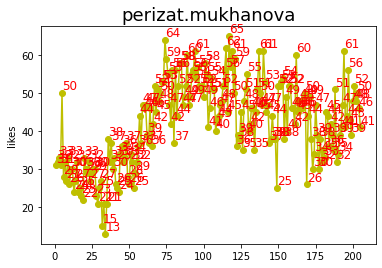

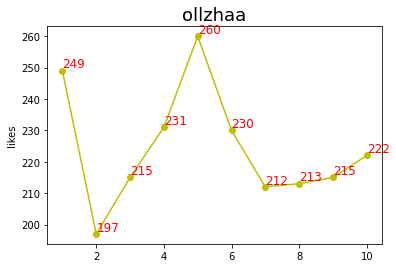

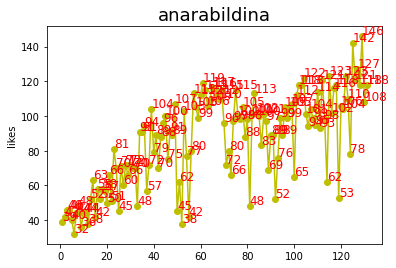

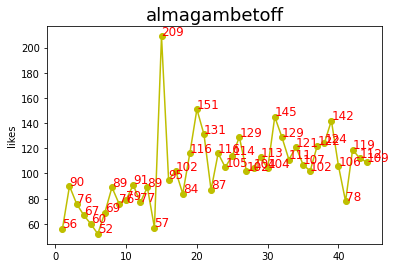

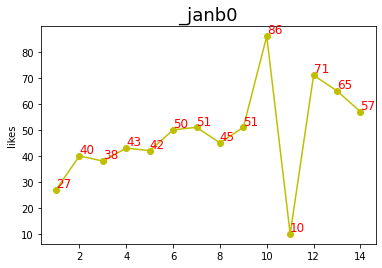

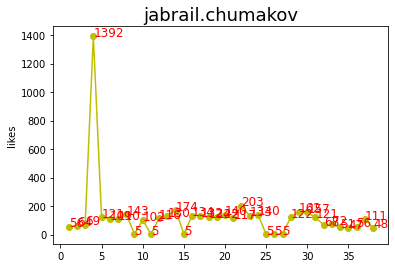

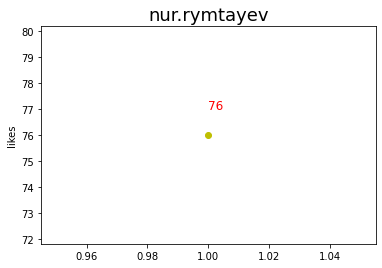

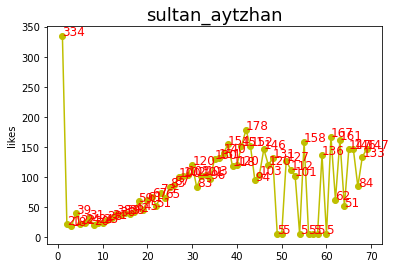

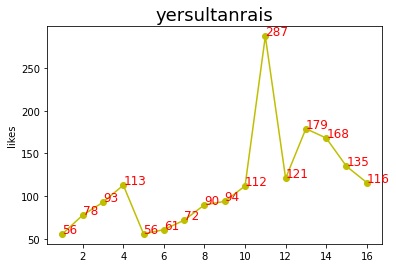

In [31]:
import csv
csv_output = []
accounts = []
with open('posts.csv','r',newline='',encoding='utf-8') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    for row in csv_reader:
        csv_output.append(row)
csv_output.pop(0)

d = {}
import matplotlib.pyplot as plt

for row in csv_output:
    name = row[0]
    post_link = row[1]
    likes_count = int(row[2])
    likes = d.get(name, [])
    likes.insert(0, likes_count)
    d[name] = likes

    
    
plt.figure(figsize=(6,3))

for name in d:
    x = [i for i in range(1,len(d[name])+1)]
    y = d[name]
    plt.plot(x, y, 'yo-')
    plt.title(f'{name}', size=18)
    for i,j in zip(x,y):
        inplot = plt.annotate(str(j),xy=(i,j+1),fontsize=12,color='red')
    plt.ylabel('likes')
    plt.show()
    